In [1]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

# Definition of functions

In [2]:
def polyModelWithNoise(x,theta,sigma):
    '''calculate polynomial model with normal distribution noise
    set sigma = 0.0 if don't want noise
    Inputs:
        x is a numpy array of x values
        theta are the parameters of the polynomial (any length)
        sigma is the standard deviation of the noise distribution that is added
    Output: y = theta_0 + theta_1*x + ... + theta_n*x^n + noise'''
    output = np.zeros(len(x))
    for i in range(len(theta)):
        output += theta[i]*x**i
    return output + np.random.normal(loc=0, scale=sigma, size=len(x))

In [3]:
def polyGradient(x,theta):
    '''return the gradient of the polynomial function
    Inputs:
        x is a numpy array of x values
        theta are the parameters of the polynomial (any length)
    Output: dy/dtheta with y = theta_0 + theta_1*x + ... + theta_n*x^n'''
    output = np.zeros((len(theta),len(x)))
    for i in range(len(theta)):
        output[i] = x**i
    return output

In [4]:
def SGD(numSteps, eta, theta, theta_real, sigma):
    '''Implement Stochastic Gradient Descent algorighm
    using a batch of 10 random numbers from 0 to 1
    Inputs:
            numSteps is the number of steps to update
            eta is the learning rate
            theta are the initial guess of the parameters
            theta_real are the real parameters
            sigma is the standard deviation of the noise distribution that is added
    Outputs:
            theta are the final updated parameters
            chiSqArray is the array of chi squared for each iteration
            '''
    # Array of chi squared
    chiSqArray=np.zeros(numSteps)  

    for i in range(numSteps):
        # 10 random numbers from 0 to 1
        x = np.random.random(10)
        # data values with noise
        y_data = polyModelWithNoise(x,theta_real,sigma)
        # model values using current theta without noise
        y_model = polyModelWithNoise(x,theta,0.0)
        
        # append chi squared
        chiSqArray[i]=np.average((y_model-y_data)**2)
        # Work out difference to true function
        deviation=y_model-y_data
        # Now work out where do go next
        theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    return theta, chiSqArray

# Polynomial model with noise

Show polynomial model with and without noise to see the how the noise affects it.

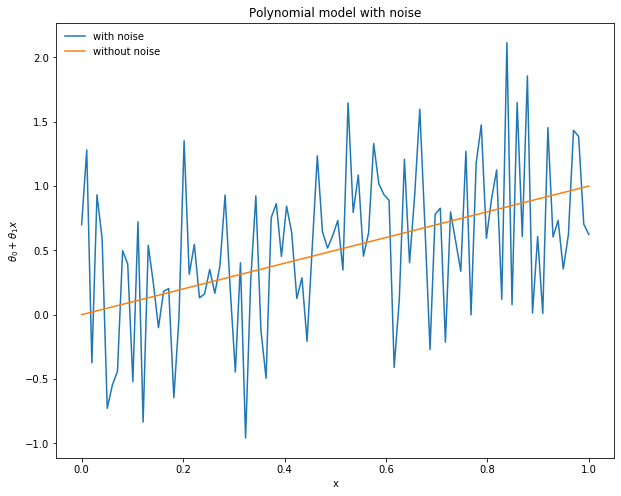

In [5]:
# 100 points linearly arranged between 0 and 1
x = np.linspace(0,1,100)
# parameters
theta = np.array([0,1])
# standard deviation of the noise
sigma = 0.5
# calculate polynomial model with and without noise
y_noise = polyModelWithNoise(x,theta,sigma)
y = polyModelWithNoise(x,theta,0.0)
# plot
plt.figure(figsize=(10,8))
plt.plot(x,y_noise,label='with noise')
plt.plot(x,y,label='without noise')
plt.title('Polynomial model with noise')
plt.xlabel('x')
plt.ylabel(r'$\theta_0 + \theta_1 x$')
plt.legend()

# Linear model with noise

In [6]:
# Number of steps for minimisation
numSteps=100 
# 'Learning' rate
eta=0.5 
# Start place of parameters
theta=[-1,0]
# Real/Objective parameters
theta_real = [0,1]

# use SGD to find the updated theta and the chi squared
theta, chiSqArray = SGD(numSteps, eta, theta, theta_real, sigma)

Text(0.5, 1.0, 'Convergence of SGD of the polynomial model with noise')

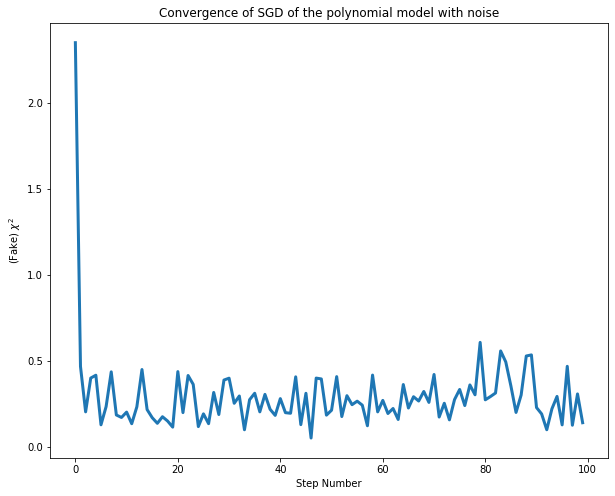

In [7]:
# plot the convergence graph over the iterations
fig, ax = plt.subplots(figsize=(10,8))
count=np.arange(numSteps+1)  
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Convergence of SGD of the polynomial model with noise')

# 3th polynomial model with noise

In [8]:
# Start place of parameters for 1st, 3rd and 7th polynomial model
theta1=[-1,0.5] 
theta3=[-1,0.5,1,1] 
theta7=[-1,0.5,1,1,1,1,1,1]
# Real/Objective parameters
theta_real = [0,1,2,2]

# use SGD to find the updated theta and the chi squared for all models
theta1, chiSqArray1 = SGD(numSteps, eta, theta1, theta_real, sigma)
theta3, chiSqArray3 = SGD(numSteps, eta, theta3, theta_real, sigma)
theta7, chiSqArray7 = SGD(numSteps, eta, theta7, theta_real, sigma)

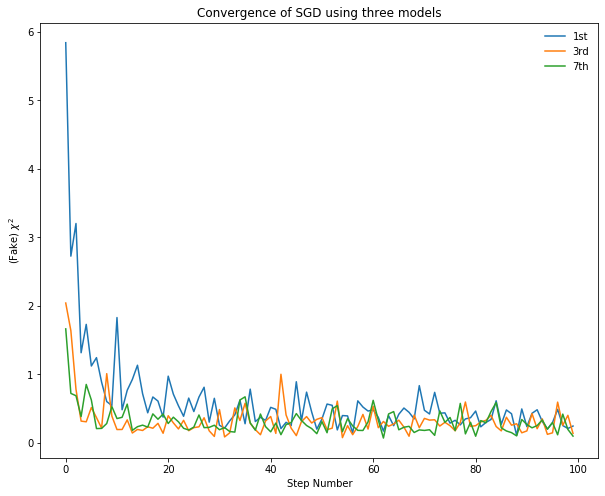

In [9]:
# plot the convergence graph over the iterations for all models
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(count[:-1],chiSqArray1,label='1st')
ax.plot(count[:-1],chiSqArray3,label='3rd')
ax.plot(count[:-1],chiSqArray7,label='7th')
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Convergence of SGD using three models')
ax.legend()

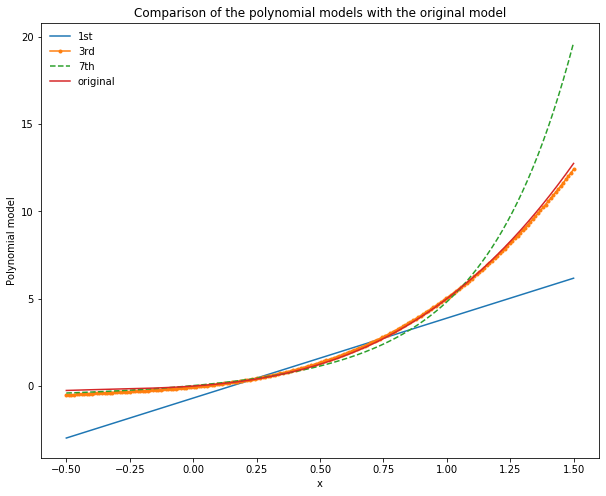

In [10]:
# original third order polynomial data over -0.5 and 1.5
x = np.linspace(-0.5,1.5,200)
y_original = polyModelWithNoise(x,theta_real,0.0)

# compute the models within -0.5 and 1.5
y1 = polyModelWithNoise(x,theta1,0.0)
y3 = polyModelWithNoise(x,theta3,0.0)
y7 = polyModelWithNoise(x,theta7,0.0)

# plot
plt.figure(figsize=(10,8))
plt.plot(x,y1,label='1st')
plt.plot(x,y3,'.-',label='3rd')
plt.plot(x,y7,'--',label='7th')
plt.plot(x,y_original,label='original')
plt.title('Comparison of the polynomial models with the original model')
plt.xlabel('x')
plt.ylabel('Polynomial model')
plt.legend()

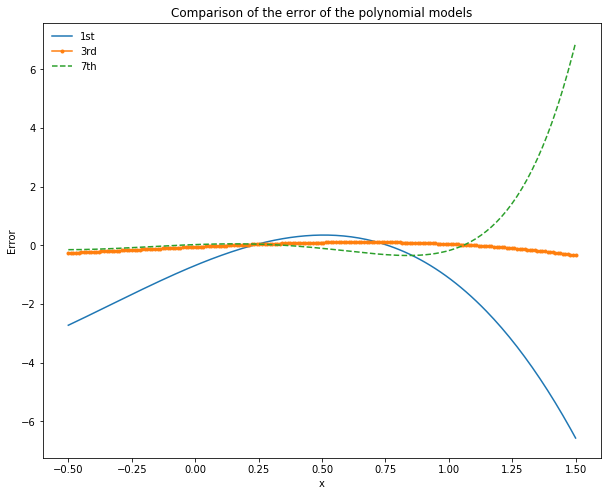

In [11]:
# plot the error between original model and the 3 models
plt.figure(figsize=(10,8))
plt.plot(x,y1-y_original,label='1st')
plt.plot(x,y3-y_original,'.-',label='3rd')
plt.plot(x,y7-y_original,'--',label='7th')
plt.title('Comparison of the error of the polynomial models')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()

It can be seen from the convergence graph (trained range), the 3rd and 7th model are the best models. However, if we extend the x range (out of trained range), we see clearly that the 3rd model is indeed the best one, which is logical as the original model is a 3rd order polynomial model but with noise.

For data bigger than 1, we can see that the 3rd model predicts quite well and the 7th model does not give an accurate prediction. For data smaller than 0, we can see that the 3rd model and the 7th model have a similar prediction. However, it depends on the initial guess. 

We can conclude that the 7th model is a case of over-fitting and the 1st model is a case of under-fitting. The 7th poly model is too complex and too difficult (for the trained range it gives a very good prediction but fails to predict an extended range, as can be seen in the last graph where error of 7th model increases after x=1); the 1st poly model is too "easy" and does not have the ability of predicting a curve.

However, everything done above was using a particular $\theta$. If we changed the starting $\theta$, we would get a different graph, but we expect the 3rd poly model to be the best one. One example is the following.

# 3th polynomial model with noise (with random starting theta)

In [12]:
# Random start place of parameters from -2 to 2
theta1=np.random.uniform(-2,2,2)
theta3=np.random.uniform(-2,2,4)
theta7=np.random.uniform(-2,2,8)

# use SGD to find the updated theta and the chi squared for all models
theta1, chiSqArray1 = SGD(numSteps, eta, theta1, theta_real, sigma)
theta3, chiSqArray3 = SGD(numSteps, eta, theta3, theta_real, sigma)
theta7, chiSqArray7 = SGD(numSteps, eta, theta7, theta_real, sigma)

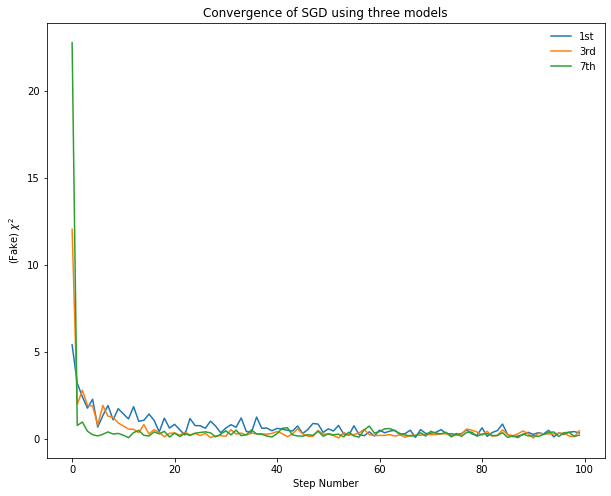

In [13]:
# plot the convergence graph over the iterations for all models
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(count[:-1],chiSqArray1,label='1st')
ax.plot(count[:-1],chiSqArray3,label='3rd')
ax.plot(count[:-1],chiSqArray7,label='7th')
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Convergence of SGD using three models')
ax.legend()

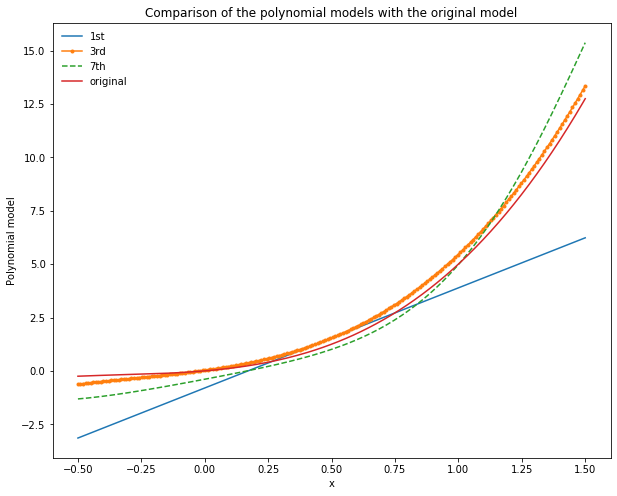

In [14]:
# compute the models within -0.5 and 1.5
y1 = polyModelWithNoise(x,theta1,0.0)
y3 = polyModelWithNoise(x,theta3,0.0)
y7 = polyModelWithNoise(x,theta7,0.0)

# plot
plt.figure(figsize=(10,8))
plt.plot(x,y1,label='1st')
plt.plot(x,y3,'.-',label='3rd')
plt.plot(x,y7,'--',label='7th')
plt.plot(x,y_original,label='original')
plt.title('Comparison of the polynomial models with the original model')
plt.xlabel('x')
plt.ylabel('Polynomial model')
plt.legend()

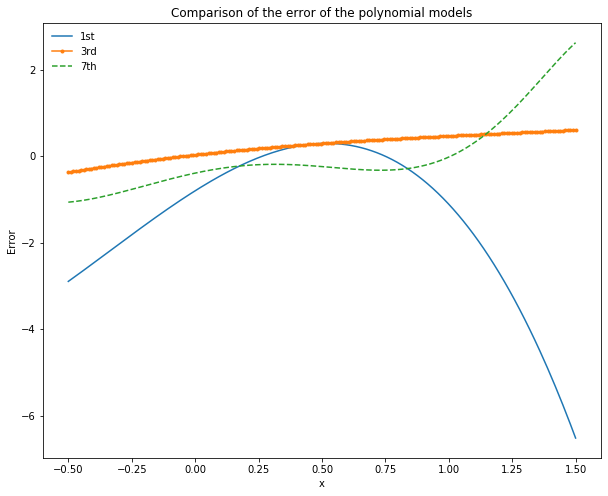

In [15]:
# plot the error between original model and the 3 models
plt.figure(figsize=(10,8))
plt.plot(x,y1-y_original,label='1st')
plt.plot(x,y3-y_original,'.-',label='3rd')
plt.plot(x,y7-y_original,'--',label='7th')
plt.title('Comparison of the error of the polynomial models')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()